# Задача

В приложенных файлах вы увидите данные по прохождению студентами тестов на образовательной платформе.
Такие данные могут быть использованы для построения персонализированных ИИ-ассистентов для поддержки обучения студента.
На текущем этапе сосредоточимся на начальном этапе — сборе и подготовке данных.

**Вам необходимо:**
Используя библиотеку pandas (или аналоги), проанализировать как можно больше характеристик, влияющих на успеваемость студентов.

**Ресурсы:**
- Данные на Kaggle (https://www.kaggle.com/competitions/riiid-test-answer-prediction/data)
- Данные для скачивания (https://drive.google.com/drive/folders/1k0k3d-WO9kYqp0q9QG1WcmLn6mWWs0Zd?usp=sharing)

Результат прислать в формате ссылки на Github с ноутбуком

**Описание данных:**
Для выполнения задания вам необходимы файлы train.csv, lectures.csv, questions.csv.

In [1]:
# Импорт необходимых библиотек:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Обработка исходных данных

## train.csv
### Описание содержимого:
---
1. **row_id**: (int64) Код идентификатора строки.
---
2. **timestamp**: (int64) Время в миллисекундах между этим взаимодействием пользователя и завершением первого события этого пользователя.
---
3. **user_id**: (int32) Код идентификатора пользователя.
---
4. **content_id**: (int16) Код идентификатора взаимодействия пользователя.
---
5. **content_type_id**: (int8) 0, если событие связано с вопросом, заданным пользователю, 1 — если событие связано с просмотром лекции.
---
6. **task_container_id**: (int16) Код идентификатора группы вопросов или лекций. Например, пользователь может увидеть три вопроса подряд, прежде чем увидеть объяснение к ним. Все эти три вопроса будут иметь одинаковый `task_container_id`.
---
7. **user_answer**: (int8) Ответ пользователя на вопрос, если он был. Читайте -1 как отсутствие ответа, для лекций.
---
8. **answered_correctly**: (int8) Указание, ответил ли пользователь правильно. Читайте -1 как отсутствие ответа, для лекций.
---
9. **prior_question_elapsed_time**: (float32) Среднее время в миллисекундах, которое потребовалось пользователю для ответа на каждый вопрос в предыдущей группе вопросов, игнорируя лекции между ними. Это значение отсутствует для первой группы вопросов или лекции пользователя. Время рассчитывается как среднее время, которое пользователь потратил на решение каждого вопроса в предыдущей группе.
---
10. **prior_question_had_explanation**: (bool) Показывает, видел ли пользователь объяснение и правильные ответы на вопросы предыдущей группы, игнорируя лекции между ними. Это значение общедоступно для всей группы вопросов и отсутствует для первой группы вопросов или лекции пользователя. Обычно первые несколько вопросов, которые видит пользователь, принадлежат диагностическому тесту, и на них не было объяснений.
---

Проанализировав описание, было принято решение при считывании данных сразу указать необходимые для них типы:
- int64
- int32
- int16
- int8
- float32
- bool

Дополнительно: исходя из описания столбца **content_type_id** (0, если событие связано с вопросом, заданным пользователю, 1 — если событие связано с просмотром лекции.), стоит заменить тип данных **int8** на **bool**.

Учитывая что файл достаточно большого объёма, считаем миллион строк, для оценки данных (Учитывая объём оперативной памяти).

**Исходя из объёма файла, было принято решение выгружать часть данных, ограничив выборку 1 миллионом строк. Это позволяет эффективно проводить предварительный анализ, не перегружая систему. Такой объем данных достаточно для получения общего представления о структуре и закономерностях, необходимых для дальнейшей работы.**

In [2]:
# Определение типов данных для каждого столбца в DataFrame
dtypes = {
    "row_id": "int64",  # Идентификатор строки, целочисленный тип (64-битный)
    "timestamp": "int64",  # Время в миллисекундах, целочисленный тип (64-битный)
    "user_id": "int32",  # Идентификатор пользователя, целочисленный тип (32-битный)
    "content_id": "int16",  # Идентификатор контента, целочисленный тип (16-битный)
    "content_type_id": "boolean",  # Тип контента (вопрос или лекция), логический тип (True/False)
    "task_container_id": "int16",  # Идентификатор контейнера задач (группы вопросов/лекций), целочисленный тип (16-битный)
    "user_answer": "int8",  # Ответ пользователя, целочисленный тип (8-битный)
    "answered_correctly": "int8",  # Указание, ответил ли пользователь правильно, целочисленный тип (8-битный)
    "prior_question_elapsed_time": "float32",  # Время на предыдущие вопросы, с плавающей точкой (32-битный)
    "prior_question_had_explanation": "boolean"  # Была ли объяснение для предыдущего вопроса, логический тип (True/False)
}

# Чтение файла CSV с указанными типами данных и ограничением в 1 миллион строк, без столбца 'row_id'
train = pd.read_csv(filepath_or_buffer="train.csv", dtype=dtypes, nrows=1_000_000).drop('row_id', axis=1)

# train содержит только первые 1 миллион строк из файла train.csv

**Обоснование удаления столбца `row_id` из набора данных:**

- **Неинформативность для анализа**:
   Столбец `row_id` является просто уникальным идентификатором для каждой строки в наборе данных. Этот столбец не несет полезной информации для анализа, так как его значение не влияет на закономерности, которые могут быть исследованы в данных. В контексте задач анализа данных, такие идентификаторы часто не имеют практического применения, так как не связаны с поведением пользователей или характеристиками контента.

- **Уменьшение размерности**:
   Удаление столбца с уникальными идентификаторами позволяет уменьшить размерность данных, что может ускорить выполнение алгоритмов, особенно при работе с большими наборами данных. Это также улучшает читаемость данных и позволяет сосредоточиться на более значимых столбцах.


In [3]:
# Выведем первые 10 строк DataFrame
train.head(10)

,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation
0,0,115,5692,False,1,3,1,NaN,<NA>
1,56943,115,5716,False,2,2,1,37000.0,False
2,118363,115,128,False,0,0,1,55000.0,False
3,131167,115,7860,False,3,0,1,19000.0,False
4,137965,115,7922,False,4,1,1,11000.0,False
5,157063,115,156,False,5,2,1,5000.0,False
6,176092,115,51,False,6,0,1,17000.0,False
7,194190,115,50,False,7,3,1,17000.0,False
8,212463,115,7896,False,8,2,1,16000.0,False
9,230983,115,7863,False,9,0,1,16000.0,False


In [4]:
# Заполним пустые ячейки значениями False (для анализа данных это равнозначные значения)
train['prior_question_had_explanation'] = train['prior_question_had_explanation'].fillna(False)

# Замена -1 на NaN для лекций
train['user_answer'] = train['user_answer'].replace(-1, pd.NA)
train['answered_correctly'] = train['answered_correctly'].replace(-1, pd.NA)

In [5]:
# Выводим информацию о DataFrame, включая количество строк, столбцов, типы данных и количество ненулевых значений
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   timestamp                       1000000 non-null  int64  
 1   user_id                         1000000 non-null  int32  
 2   content_id                      1000000 non-null  int16  
 3   content_type_id                 1000000 non-null  boolean
 4   task_container_id               1000000 non-null  int16  
 5   user_answer                     980093 non-null   object 
 6   answered_correctly              980093 non-null   object 
 7   prior_question_elapsed_time     976277 non-null   float32
 8   prior_question_had_explanation  1000000 non-null  boolean
dtypes: boolean(2), float32(1), int16(2), int32(1), int64(1), object(2)
memory usage: 38.1+ MB


In [6]:
# Проверка на наличие дубликатов
duplicates = train.duplicated().sum()
print(f"Количество дубликатов: {duplicates}")

# Удаление дубликатов, если есть
if duplicates:
    print(f"Размер данных до удаления дубликатов: {train.shape}")
    train = train.drop_duplicates()
    print(f"Размер данных после удаления дубликатов: {train.shape}")

Количество дубликатов: 2
Размер данных до удаления дубликатов: (1000000, 9)
Размер данных после удаления дубликатов: (999998, 9)


In [7]:
# Проверка пропусков
print(train.isnull().sum())

timestamp                             0
user_id                               0
content_id                            0
content_type_id                       0
task_container_id                     0
user_answer                       19907
answered_correctly                19907
prior_question_elapsed_time       23723
prior_question_had_explanation        0
dtype: int64


In [8]:
# Заполнение пропусков в prior_question_elapsed_time медианным значением
median_elapsed_time = train['prior_question_elapsed_time'].median()
train['prior_question_elapsed_time'] = train['prior_question_elapsed_time'].fillna(median_elapsed_time)

# Проверка пропусков после обработки
print(train.isnull().sum())

timestamp                             0
user_id                               0
content_id                            0
content_type_id                       0
task_container_id                     0
user_answer                       19907
answered_correctly                19907
prior_question_elapsed_time           0
prior_question_had_explanation        0
dtype: int64


Заполнение пропусков медианными значениями используется для минимизации искажения данных, особенно когда пропуски присутствуют в количественных переменных, как в случае с `prior_question_elapsed_time`. Медианное значение менее подвержено влиянию выбросов, чем среднее, и позволяет сохранить структуру данных, не искажая распределение времени, затраченного на ответы.


После обработки остались пропуски только в колонках user_answer и answered_correctly.
Это логично, так как эти значения отсутствуют для лекций (content_type_id = 1).
В зависимости от дальнейшего анализа, пропуски в этих колонках можно оставить как есть.

## questions.csv
### Описание содержимого:
---
1. **question_id**: (int16) Внешний ключ для столбца content_id в train/test, когда тип контента — вопрос (0).
---
2. **bundle_id**: (int16) Код, указывающий, какие вопросы подаются вместе.
---
3. **correct_answer**: (int8) Ответ на вопрос. Может быть сравнён с ответом пользователя в столбце user_answer в train для проверки правильности ответа.
---
4. **part**: (int8) Соответствующий раздел теста TOEIC.
---
5. **tags**: (str) Один или несколько кодов тегов для вопроса. Значение тегов не предоставляется, но этих кодов достаточно для кластеризации вопросов.
---

Проанализировав описание, было принято решение при считывании данных сразу указать необходимые для них типы:
- int16
- int8
- str

In [9]:
# Определение типов данных для каждого столбца в DataFrame
dtypes = {
    "question_id": "int32",  # Идентификатор вопроса, целочисленный тип (32-битный)
    "bundle_id": "int16",  # Идентификатор набора вопросов, целочисленный тип (16-битный)
    "correct_answer": "int8",  # Ответ на вопрос, целочисленный тип (8-битный)
    "part": "int8",  # Раздел теста (часть TOEIC), целочисленный тип (8-битный)
    "tags": "object"  # Теги для вопроса, категориальный тип
}

# Чтение файла CSV с указанными типами данных
questions = pd.read_csv("questions.csv", dtype=dtypes)

In [10]:
# Выведем первые 10 строк DataFrame
questions.head(10)

,question_id,bundle_id,correct_answer,part,tags
0,0,0,0,1,51 131 162 38
1,1,1,1,1,131 36 81
2,2,2,0,1,131 101 162 92
3,3,3,0,1,131 149 162 29
4,4,4,3,1,131 5 162 38
5,5,5,2,1,131 149 162 81
6,6,6,2,1,10 94 162 92
7,7,7,0,1,61 110 162 29
8,8,8,3,1,131 13 162 92
9,9,9,3,1,10 164 81


In [11]:
print(f"Количество вопросов: {questions['question_id'].shape[0]}")

Количество вопросов: 13523


In [12]:
# Проверка общей информации о DataFrame
questions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13523 entries, 0 to 13522
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   question_id     13523 non-null  int32 
 1   bundle_id       13523 non-null  int16 
 2   correct_answer  13523 non-null  int8  
 3   part            13523 non-null  int8  
 4   tags            13522 non-null  object
dtypes: int16(1), int32(1), int8(2), object(1)
memory usage: 211.4+ KB


In [13]:
# Проверка на наличие пропущенных значений
# Проверка на наличие пропущенных значений в данных lectures
missing_values = questions.isnull().sum()

# Выводим информацию о пропусках
if missing_values.any():
    print("Пропущенные значения обнаружены в следующих столбцах:")
    print(missing_values[missing_values > 0])
else:
    print("Пропущенные значения отсутствуют во всех столбцах.")

Пропущенные значения обнаружены в следующих столбцах:
tags    1
dtype: int64


**Пропуск в столбце не критичен, можем его оставить.**

In [14]:
# Проверка на наличие дубликатов
duplicates = questions.duplicated().sum()
print(f"Количество дубликатов: {duplicates}")

# Удаление дубликатов, если есть
if duplicates:
    print(f"Размер данных до удаления дубликатов: {questions.shape}")
    questions = questions.drop_duplicates()
    print(f"Размер данных после удаления дубликатов: {questions.shape}")

Количество дубликатов: 0


## lectures.csv
### Описание содержимого:
---
1. **lecture_id**: (int16) Внешний ключ для столбца content_id в train/test, когда тип контента — лекция (1).
---
2. **part**: (int8) Код верхнего уровня для категории лекции.
---
3. **tag**: (str) Один код тега для лекции. Значение тегов не предоставляется, но этих кодов достаточно для кластеризации лекций.
---
4. **type_of**: (str) Краткое описание основной цели лекции.
---

In [15]:
# Определение типов данных для каждого столбца в DataFrame
dtypes_lectures = {
    "lecture_id": "int32",  # Идентификатор лекции, целочисленный тип (32-битный)
    "part": "int8",  # Категория лекции, целочисленный тип (8-битный)
    "tag": "object",  # Теги для лекции, категориальный тип
    "type_of": "object"  # Описание типа лекции, строковый тип
}

# Чтение файла CSV с указанными типами данных
lectures = pd.read_csv("lectures.csv", dtype=dtypes_lectures)

In [16]:
# Выводим первые 10 строк DataFrame
lectures.head(10)

,lecture_id,tag,part,type_of
0,89,159,5,concept
1,100,70,1,concept
2,185,45,6,concept
3,192,79,5,solving question
4,317,156,5,solving question
5,335,114,2,concept
6,484,179,5,concept
7,641,134,6,solving question
8,761,93,1,concept
9,814,80,5,solving question


In [17]:
# Проверка общей информации о DataFrame
lectures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   lecture_id  418 non-null    int32 
 1   tag         418 non-null    object
 2   part        418 non-null    int8  
 3   type_of     418 non-null    object
dtypes: int32(1), int8(1), object(2)
memory usage: 8.7+ KB


In [18]:
# Проверка на наличие пропущенных значений в данных lectures
missing_values = lectures.isnull().sum()

# Выводим информацию о пропусках
if missing_values.any():
    print("Пропущенные значения обнаружены в следующих столбцах:")
    print(missing_values[missing_values > 0])
else:
    print("Пропущенные значения отсутствуют во всех столбцах.")

Пропущенные значения отсутствуют во всех столбцах.


In [19]:
# Проверка на наличие дубликатов
duplicates_lectures = lectures.duplicated().sum()
print(f"Количество дубликатов: {duplicates_lectures}")

# Удаление дубликатов, если есть
if duplicates_lectures:
    print(f"Размер данных до удаления дубликатов: {lectures.shape}")
    lectures = lectures.drop_duplicates()
    print(f"Размер данных после удаления дубликатов: {lectures.shape}")

Количество дубликатов: 0


# Анализ предобработанных данных

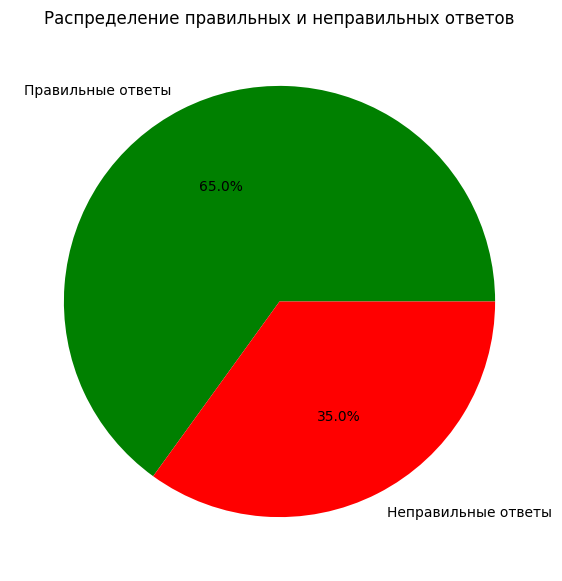

In [20]:
# Получаем нормализованное распределение правильных и неправильных ответов
answer_distribution = train[train['answered_correctly'] != -1]['answered_correctly'].value_counts(normalize=True)

# Строим круговую диаграмму с тёмными оттенками
plt.figure(figsize=(7,7))
plt.pie(answer_distribution, labels=['Правильные ответы', 'Неправильные ответы'], autopct='%1.1f%%', colors=['green', 'red'])  # темный зеленый и красный

plt.title('Распределение правильных и неправильных ответов')
plt.show()

Распределение правильных и неправильных ответов на платформе показывает, что 65% всех ответов были правильными, а 35% — неправильными. Это свидетельствует о том, что студенты в среднем показывают достаточно высокую успеваемость, отвечая верно на большинство вопросов. Однако существует значительный процент неправильных ответов, что также указывает на наличие трудных для студентов вопросов или на недостаточную подготовленность некоторых пользователей.

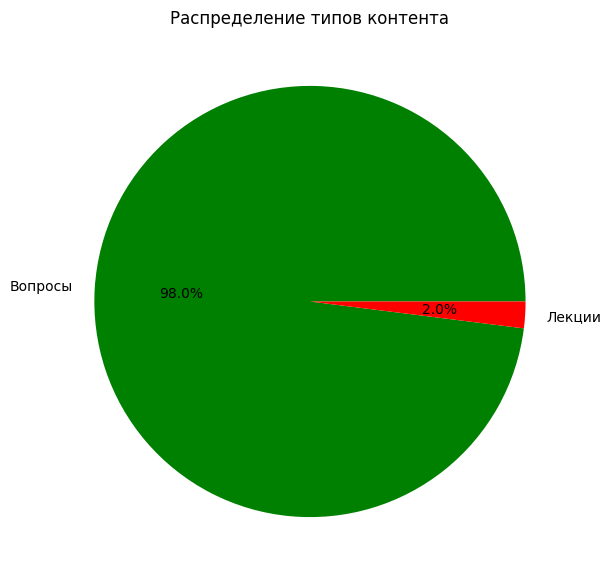

In [21]:
# Получаем нормализованное распределение по типам контента
content_type_distribution = train['content_type_id'].value_counts(normalize=True)

# Строим круговую диаграмму
plt.figure(figsize=(7,7))
plt.pie(content_type_distribution, labels=['Вопросы', 'Лекции'], autopct='%1.1f%%', colors=['green', 'red'])

# Добавляем заголовок
plt.title('Распределение типов контента')
plt.show()

Из данных видно, что основная активность студентов приходится на ответы на вопросы, в то время как просмотры лекций составляют меньшую часть. Анализ показывает, что 98% всех действий студентов связано с ответами на вопросы.

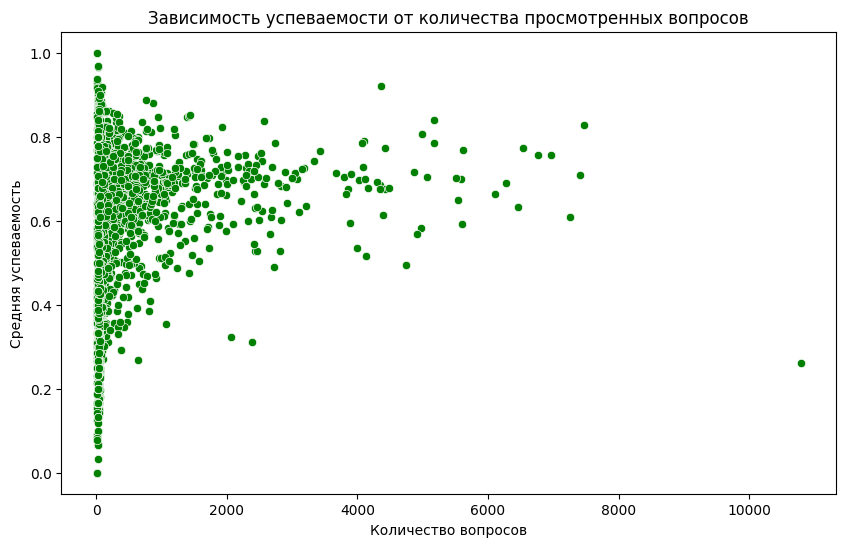

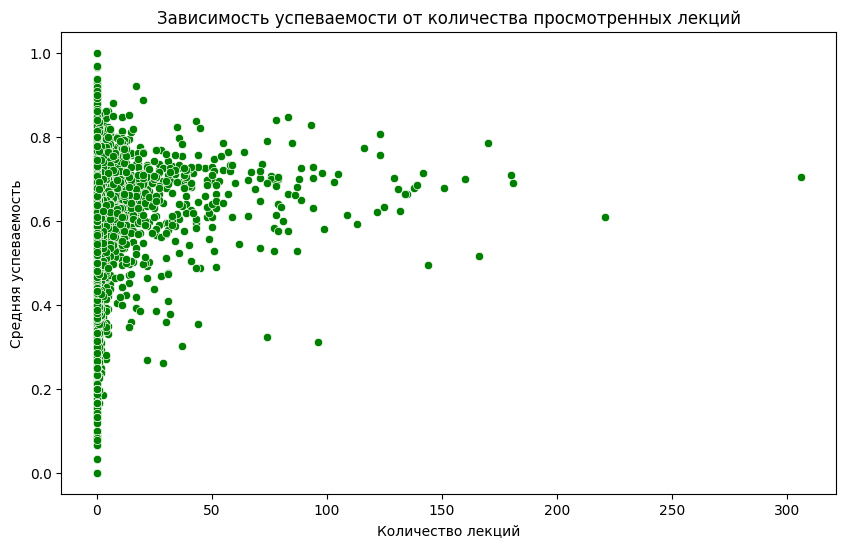

Корреляция между количеством вопросов и успеваемостью: 0.23
Корреляция между количеством лекций и успеваемостью: 0.19


In [22]:
# Рассчитаем количество вопросов и лекций для каждого пользователя
user_activity = train.groupby('user_id').agg(
    total_questions=('content_type_id', lambda e: (e == 0).sum()),  # количество вопросов
    total_lectures=('content_type_id', lambda e: (e == 1).sum())  # количество лекций
).reset_index()

# Рассчитаем среднюю успеваемость для каждого пользователя
user_performance = train.groupby('user_id')['answered_correctly'].mean().reset_index()

# Объединим данные по активности и успеваемости
user_data = pd.merge(user_activity, user_performance, on='user_id')

# Визуализируем зависимость между количеством вопросов и успеваемостью
plt.figure(figsize=(10, 6))
sns.scatterplot(data=user_data, x='total_questions', y='answered_correctly', color='green')
plt.title("Зависимость успеваемости от количества просмотренных вопросов")
plt.xlabel("Количество вопросов")
plt.ylabel("Средняя успеваемость")
plt.show()

# Визуализируем зависимость между количеством лекций и успеваемостью
plt.figure(figsize=(10, 6))
sns.scatterplot(data=user_data, x='total_lectures', y='answered_correctly', color='green')
plt.title("Зависимость успеваемости от количества просмотренных лекций")
plt.xlabel("Количество лекций")
plt.ylabel("Средняя успеваемость")
plt.show()

# Можно также использовать корреляцию для оценки зависимости
correlation_questions = user_data['total_questions'].corr(user_data['answered_correctly'])
correlation_lectures = user_data['total_lectures'].corr(user_data['answered_correctly'])

print(f"Корреляция между количеством вопросов и успеваемостью: {correlation_questions:.2f}")
print(f"Корреляция между количеством лекций и успеваемостью: {correlation_lectures:.2f}")

### Коэффициент корреляции Пирсона (или Pearson's correlation coefficient)

Измеряет степень линейной зависимости между двумя переменными. Он принимает значения от -1 до 1:

* +1: Полная положительная линейная зависимость. Это означает, что с увеличением одной переменной, другая также увеличивается пропорционально.
* -1: Полная отрицательная линейная зависимость. Это означает, что с увеличением одной переменной, другая уменьшается пропорционально.
* 0: Отсутствие линейной зависимости между переменными. Это не обязательно означает отсутствие связи между переменными вообще (может быть нелинейная зависимость).

Общая интерпретация:
* Значения около 0: указывают на слабую или практически отсутствие линейной зависимости.
* 0.1 - 0.3: Слабая положительная корреляция.
* 0.3 - 0.5: Умеренная положительная корреляция.
* 0.5 - 1.0: Сильная положительная корреляция.
* -0.1 - -0.3: Слабая отрицательная корреляция.
* -0.3 - -0.5: Умеренная отрицательная корреляция.
* -0.5 - -1.0: Сильная отрицательная корреляция.

**Полученные результаты показывают **слабую положительную зависимость** между этими переменными.**

1. **Корреляция 0.23 (вопросы)**:
   - Это значение указывает на **слабую положительную корреляцию** между количеством вопросов, с которыми пользователь взаимодействует, и его успеваемостью.
   - То есть, с увеличением числа вопросов, на которые пользователи отвечают, их успеваемость немного повышается, но эта связь не очень сильная. Возможно, пользователи, которые решают больше вопросов, становятся более опытными и, следовательно, лучше отвечают.

2. **Корреляция 0.19 (лекции)**:
   - Это значение также говорит о **слабой положительной зависимости**, но с несколько меньшей силой, чем у вопросов.
   - Таким образом, просмотр лекций может слегка повышать успеваемость, однако это влияние тоже не сильно выражено. Возможно, пользователи, которые смотрят лекции, получают дополнительные знания, но этого недостаточно для сильного улучшения результатов.

---

- Слабая корреляция говорит о том, что **другие факторы могут иметь большее влияние** на успеваемость, чем количество вопросов или лекций. Например, такие факторы как уровень подготовки пользователя, его мотивация, качество объяснений и другое могут существенно влиять на результаты.
- Также следует учитывать, что другие аспекты обучения, не связанные напрямую с количеством просмотренных вопросов или лекций, могут играть важную роль в успеваемости.

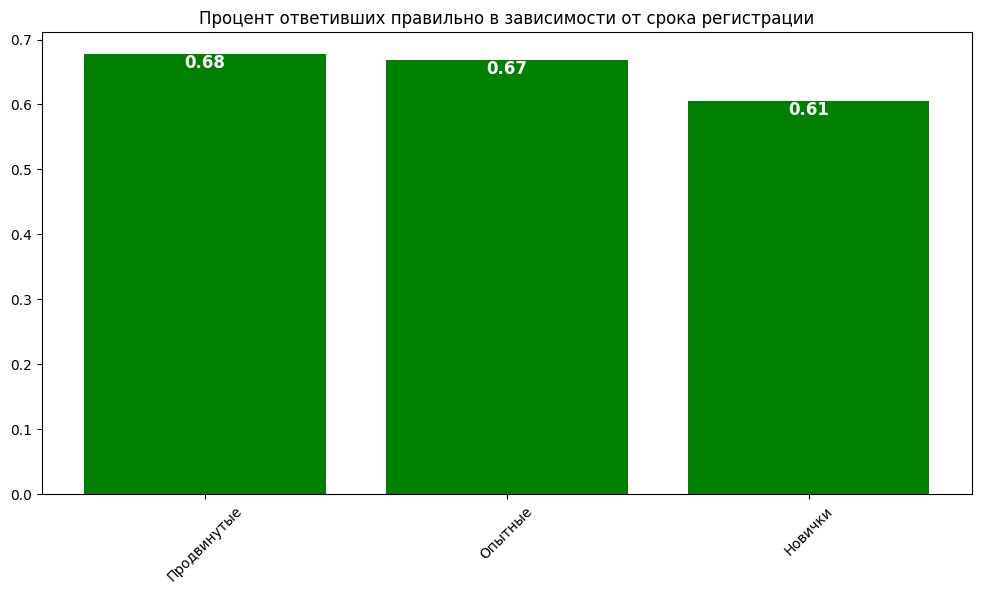

In [23]:
# Создаем 5 временных интервалов для timestamp
# bin_labels_5 = ['Очень ранняя регистрация', 'Ранняя регистрация', 'Средняя регистрация', 'Поздняя регистрация', 'Очень поздняя регистрация']
# train['ts_bin'] = pd.qcut(train['timestamp'], q=5, labels=bin_labels_5)
bin_labels_5 = ['Новички', "Опытные", "Продвинутые"]
train['ts_bin'] = pd.qcut(train['timestamp'], q=3, labels=bin_labels_5)

# Группируем данные по временным интервалам и правильности ответов с аргументом observed=True
correct = train[train.answered_correctly != -1].groupby(['ts_bin', 'answered_correctly'], observed=True).size().unstack(fill_value=0)

# Рассчитываем процент правильных ответов
correct['Percent_correct'] = correct[1] / (correct[0] + correct[1])

# Сортируем по проценту правильных ответов
correct = correct['Percent_correct'].sort_values(ascending=False)

# Создаем график
fig = plt.figure(figsize=(12, 6))
plt.bar(correct.index, correct.values, color='green')

# Добавляем значения на столбцы
for i, v in zip(correct.index, correct.values):
    plt.text(i, v, f"{v:.2f}", color='white', fontweight='bold', fontsize=12, va='top', ha='center')

# Настроим заголовок и метки
plt.title("Процент ответивших правильно в зависимости от срока регистрации")
plt.xticks(rotation=45)
plt.show()

Пользователи, зарегистрировавшиеся относительно недавно, показывают немного худшие результаты по успеваемости, чем те, кто использует платформу дольше. Это может быть связано с тем, что более опытные пользователи уже прошли больше контента, накопили знания и навыки, в то время как новички только начинают знакомство с платформой и, возможно, сталкиваются с трудностями на ранних этапах обучения.

### Объединение данных из таблиц **train**, **questions** и **lectures**

Данное действие является важным этапом в обработке данных, который позволяет обогатить основной набор данных дополнительной информацией.

1. **Объединение с таблицей questions:**
   - `train` содержит столбец `content_id`, который указывает на идентификатор контента, с которым взаимодействовал пользователь.
   - В таблице `questions` также есть столбец `question_id`, который соответствует идентификатору вопроса.
   - Объединяя эти таблицы по столбцам `content_id` и `question_id`, мы добавляем к данным из `train` характеристики вопросов (например, раздел теста, теги и правильный ответ), которые могут быть использованы для анализа взаимосвязи между контентом и успеваемостью пользователя.

2. **Объединение с таблицей lectures:**
   - В таблице `lectures` содержится информация о лекциях, которые пользователи просматривают, и их идентификаторы (столбец `lecture_id`).
   - Чтобы избежать дублирования столбцов при объединении, добавляется префикс `lecture_` к названиям колонок из таблицы `lectures`.
   - После этого происходит объединение данных из `train` с таблицей `lectures` по столбцам `content_id` и `lecture_lecture_id`. Таким образом, к данным пользователей добавляется информация о лекциях, которые они просматривали, что позволяет провести более детальный анализ влияния лекций на успеваемость.

Таким образом, объединение этих таблиц позволяет создать более полный набор данных, включающий как информацию о вопросах, так и о лекциях, что дает возможность лучше понять поведение пользователей и выявить закономерности в их успеваемости.

In [24]:
# Объединение train с questions по content_id
train = train.merge(questions, how="left", left_on="content_id", right_on="question_id")

# Объединение train с lectures
lectures.columns = [f"lecture_{col}" for col in lectures.columns]  # Добавление префикса для уникальности колонок
train = train.merge(lectures, how="left", left_on="content_id", right_on="lecture_lecture_id")

In [25]:
train.head(10)

,timestamp,user_id,content_id,content_type_id,task_container_id,user_answer,answered_correctly,prior_question_elapsed_time,prior_question_had_explanation,ts_bin,question_id,bundle_id,correct_answer,part,tags,lecture_lecture_id,lecture_tag,lecture_part,lecture_type_of
0,0,115,5692,False,1,3,1,21000.0,False,Новички,5692.0,5692.0,3.0,5.0,151,NaN,NaN,NaN,NaN
1,56943,115,5716,False,2,2,1,37000.0,False,Новички,5716.0,5716.0,2.0,5.0,168,NaN,NaN,NaN,NaN
2,118363,115,128,False,0,0,1,55000.0,False,Новички,128.0,128.0,0.0,1.0,131 149 92,NaN,NaN,NaN,NaN
3,131167,115,7860,False,3,0,1,19000.0,False,Новички,7860.0,7860.0,0.0,1.0,131 104 81,NaN,NaN,NaN,NaN
4,137965,115,7922,False,4,1,1,11000.0,False,Новички,7922.0,7922.0,1.0,1.0,131 149 92,NaN,NaN,NaN,NaN
5,157063,115,156,False,5,2,1,5000.0,False,Новички,156.0,156.0,2.0,1.0,131 101 162 38,NaN,NaN,NaN,NaN
6,176092,115,51,False,6,0,1,17000.0,False,Новички,51.0,51.0,0.0,1.0,131 187 81,NaN,NaN,NaN,NaN
7,194190,115,50,False,7,3,1,17000.0,False,Новички,50.0,50.0,3.0,1.0,131 101 38,NaN,NaN,NaN,NaN
8,212463,115,7896,False,8,2,1,16000.0,False,Новички,7896.0,7896.0,2.0,1.0,131 104 162 81,NaN,NaN,NaN,NaN
9,230983,115,7863,False,9,0,1,16000.0,False,Новички,7863.0,7863.0,0.0,1.0,131 68 92,NaN,NaN,NaN,NaN


In [26]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999998 entries, 0 to 999997
Data columns (total 19 columns):
 #   Column                          Non-Null Count   Dtype   
---  ------                          --------------   -----   
 0   timestamp                       999998 non-null  int64   
 1   user_id                         999998 non-null  int32   
 2   content_id                      999998 non-null  int16   
 3   content_type_id                 999998 non-null  boolean 
 4   task_container_id               999998 non-null  int16   
 5   user_answer                     980091 non-null  object  
 6   answered_correctly              980091 non-null  object  
 7   prior_question_elapsed_time     999998 non-null  float32 
 8   prior_question_had_explanation  999998 non-null  boolean 
 9   ts_bin                          999998 non-null  category
 10  question_id                     987814 non-null  float64 
 11  bundle_id                       987814 non-null  float64 
 12  co

Средняя точность пользователя (среднее значение столбца answered_correctly для каждого пользователя) помогает понять, насколько успешно каждый пользователь решает поставленные задачи.
Это может быть полезно для выявления высокоэффективных пользователей, а также для понимания, какие факторы влияют на успех в обучении.

In [27]:
# Средняя точность пользователя
user_accuracy = train.groupby('user_id')['answered_correctly'].mean()
user_accuracy.describe()

count     3824.0
unique    1658.0
top          0.5
freq       113.0
Name: answered_correctly, dtype: float64

**Результаты показывают, что:**

* Средняя точность большинства пользователей находится на уровне около 50%, что может свидетельствовать о том, что система или тесты не слишком сложны или, наоборот, пользователи не обладают достаточными знаниями.
* Значение top = 0.5 говорит о том, что 50% правильных ответов встречается наиболее часто среди пользователей, что может указывать на определённый порог сложности вопросов или баланс между правильными и неправильными ответами.

In [28]:
# Рассчитываем сложность вопросов
question_difficulty = train.groupby('content_id')['answered_correctly'].mean().reset_index()
question_difficulty.columns = ['content_id', 'difficulty']

question_difficulty.head()

,content_id,difficulty
0,0,0.863014
1,1,0.927273
2,2,0.560811
3,3,0.798995
4,4,0.602606


***Мы рассчитали сложность каждого вопроса на основе среднего значения правильных ответов (answered_correctly) для каждой группы вопросов (content_id), на основе полученных данных построим график распределения сложности.***

---

### Интерпретация результатов:
**Значение сложности (difficulty):**
- Близко к 1.0: Простые вопросы (большинство пользователей ответили правильно).
- Близко к 0.0: Сложные вопросы (большинство пользователей ответили неправильно).
- Средние значения (~0.5): Вопросы умеренной сложности, где примерно половина пользователей ошибалась.

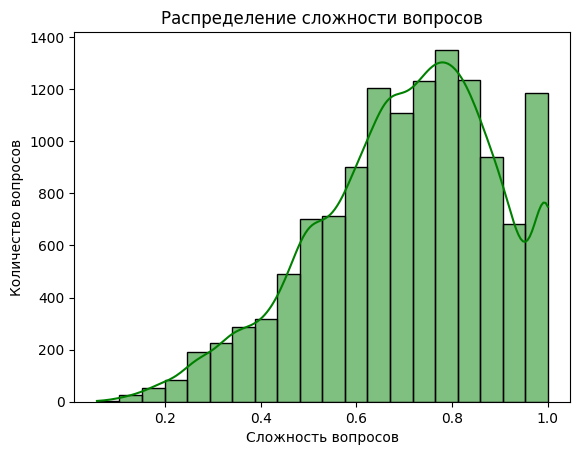

In [29]:
# Фильтрация строк, где сложность больше 0
question_difficulty = question_difficulty[question_difficulty['difficulty'] > 0]

# Распределение сложности вопросов
sns.histplot(question_difficulty['difficulty'], bins=20, kde=True, color="green")
plt.title("Распределение сложности вопросов")
plt.xlabel("Сложность вопросов")
plt.ylabel("Количество вопросов")
plt.show()

In [30]:
# Выделение слабых вопросов (сложность < 0.3)
weak_questions = question_difficulty[question_difficulty['difficulty'] < 0.3]

# Выделение сильных вопросов (сложность > 0.9)
strong_questions = question_difficulty[question_difficulty['difficulty'] > 0.9]

# Сортировка для удобства анализа
weak_questions_sorted = weak_questions.sort_values(by='difficulty')
strong_questions_sorted = strong_questions.sort_values(by='difficulty', ascending=False)

# Вывод результатов
print("Простые вопросы (сложность < 0.3):")
print(f"Количество простых вопросов: {weak_questions_sorted.shape[0]}")

print("\nСложные вопросы (сложность > 0.9):")
print(f"Количество сложных вопросов: {strong_questions_sorted.shape[0]}")

Простые вопросы (сложность < 0.3):
Количество простых вопросов: 375

Сложные вопросы (сложность > 0.9):
Количество сложных вопросов: 1939


In [31]:
# Подсчёт общего количества уникальных вопросов (content_type_id == 0)
total_questions = train[train['content_type_id'] == 0]['content_id'].nunique()

print(f"Общее количество уникальных вопросов: {total_questions}")

Общее количество уникальных вопросов: 13076


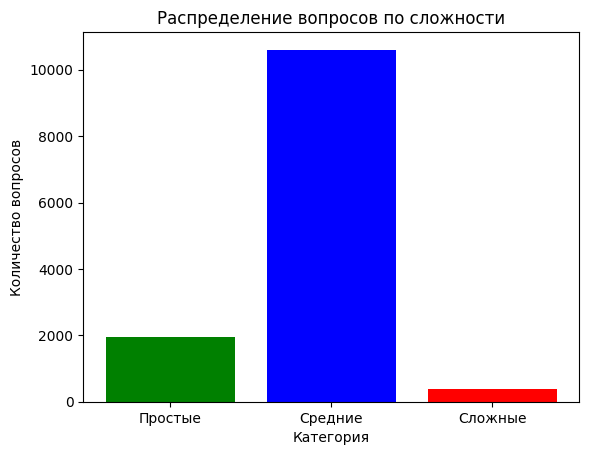

In [32]:
# Категоризация вопросов
easy_questions = question_difficulty[question_difficulty['difficulty'] > 0.9]
medium_questions = question_difficulty[(question_difficulty['difficulty'] >= 0.3) & (question_difficulty['difficulty'] <= 0.9)]
hard_questions = question_difficulty[question_difficulty['difficulty'] < 0.3]

# Подсчёт количества вопросов в каждой категории
categories = ['Простые', 'Средние', 'Сложные']
counts = [easy_questions.shape[0], medium_questions.shape[0], hard_questions.shape[0]]

# Построение диаграммы
import matplotlib.pyplot as plt

plt.bar(categories, counts, color=['green', 'blue', 'red'])
plt.title("Распределение вопросов по сложности")
plt.xlabel("Категория")
plt.ylabel("Количество вопросов")
plt.show()

- Простые вопросы (зелёный): Вопросы с высокой точностью ответов.
- Средние вопросы (синий): Вопросы с умеренной точностью.
- Сложные вопросы (красный): Вопросы с низкой точностью.

In [33]:
# Фильтрация данных для каждого типа вопросов
easy_performance = train[train['content_id'].isin(easy_questions['content_id'])].groupby('user_id')['answered_correctly'].mean()
medium_performance = train[train['content_id'].isin(medium_questions['content_id'])].groupby('user_id')['answered_correctly'].mean()
hard_performance = train[train['content_id'].isin(hard_questions['content_id'])].groupby('user_id')['answered_correctly'].mean()

# Вычисляем среднюю успеваемость в каждой категории
easy_avg = easy_performance.mean()
medium_avg = medium_performance.mean()
hard_avg = hard_performance.mean()

print(f"Средняя успеваемость на простых вопросах: {round(easy_avg, 2)}")
print(f"Средняя успеваемость на средних вопросах: {round(medium_avg, 2)}")
print(f"Средняя успеваемость на сложных вопросах: {round(hard_avg, 2)}")

Средняя успеваемость на простых вопросах: 0.92
Средняя успеваемость на средних вопросах: 0.57
Средняя успеваемость на сложных вопросах: 0.21


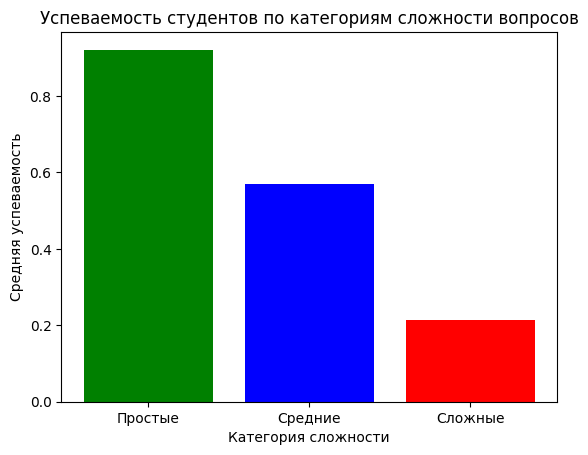

In [34]:
# Средняя успеваемость для каждой категории
categories_performance = [easy_avg, medium_avg, hard_avg]

# Построение диаграммы
categories = ['Простые', 'Средние', 'Сложные']
plt.bar(categories, categories_performance, color=['green', 'blue', 'red'])
plt.title("Успеваемость студентов по категориям сложности вопросов")
plt.xlabel("Категория сложности")
plt.ylabel("Средняя успеваемость")
plt.show()

**Средняя успеваемость на простых вопросах: 0.92**
   - Это означает, что студенты, как правило, хорошо справляются с простыми вопросами, так как их **успешность близка к 92%**. Это может свидетельствовать о том, что студенты обладают достаточной подготовленностью или имеют достаточно знаний для выполнения этих вопросов.

**Средняя успеваемость на средних вопросах: 0.57**
   - Здесь мы видим значительное снижение успеваемости по сравнению с простыми вопросами (с 0.92 до 0.57). Это может свидетельствовать о том, что студенты сталкиваются с трудностями, когда вопросы становятся более сложными и требуют более глубокого понимания материала.

**Средняя успеваемость на сложных вопросах: 0.24**
   - Этот результат ещё более показателен, поскольку **успешность студентов на сложных вопросах составляет всего 24%**. Это свидетельствует о том, что сложные вопросы представляют собой серьёзную проблему для студентов.

---

Эти результаты подтверждают, что с увеличением сложности вопросов успеваемость студентов значительно снижается.

In [35]:
# Рассчитываем процент правильных ответов для вопросов с объяснением
explanation_correct = train[train['prior_question_had_explanation'] == True].groupby('user_id')['answered_correctly'].mean()

# Рассчитываем процент правильных ответов для вопросов без объяснения
no_explanation_correct = train[train['prior_question_had_explanation'] == False].groupby('user_id')['answered_correctly'].mean()

# Вычисляем средние значения
mean_explanation = explanation_correct.mean()
mean_no_explanation = no_explanation_correct.mean()

# Рассчитываем процентное увеличение
percentage_increase = ((mean_explanation - mean_no_explanation) / mean_no_explanation) * 100

# Выводим результат
print(f"Процент правильных ответов с объяснением: {mean_explanation * 100:.2f}%")
print(f"Процент правильных ответов без объяснения: {mean_no_explanation * 100:.2f}%")
print(f"Процентное увеличение: {percentage_increase:.2f}%")

Процент правильных ответов с объяснением: 61.11%
Процент правильных ответов без объяснения: 47.60%
Процентное увеличение: 28.39%


Средний процент правильных ответов среди пользователей, которые получали объяснение к вопросам, составил 61.11%. В то время как для пользователей, которые не получали объяснений, этот показатель был значительно ниже — 47.60%. Это указывает на то, что наличие объяснений значительно повышает эффективность ответов студентов.

Процентное увеличение точности ответов с объяснением по сравнению с отсутствием объяснений составил 28.39%. Это свидетельствует о том, что объяснение влияет на улучшение понимания материала и, соответственно, на повышение успеваемости студентов.

In [36]:
# Фильтрация данных для каждой категории сложности
easy_time = train[train['content_id'].isin(easy_questions['content_id'])]['prior_question_elapsed_time'].mean() / 1000
medium_time = train[train['content_id'].isin(medium_questions['content_id'])]['prior_question_elapsed_time'].mean() / 1000
hard_time = train[train['content_id'].isin(hard_questions['content_id'])]['prior_question_elapsed_time'].mean() / 1000

# Вывод среднего времени
print(f"Среднее время на простых вопросах: {easy_time:.2f} секунд")
print(f"Среднее время на средних вопросах: {medium_time:.2f} секунд")
print(f"Среднее время на сложных вопросах: {hard_time:.2f} секунд")

Среднее время на простых вопросах: 24.61 секунд
Среднее время на средних вопросах: 25.24 секунд
Среднее время на сложных вопросах: 26.36 секунд


**Среднее время на решение вопросов ожидаемо увеличивается с ростом их сложности.**

In [37]:
# Агрегирование данных для анализа количества объяснений
explanation_analysis = train[train['answered_correctly'] != -1].groupby('answered_correctly')['prior_question_had_explanation'].sum()

# Создание DataFrame с результатами
explanation_analysis_df = pd.DataFrame({
    'Количество': explanation_analysis
})

# Сбрасываем индекс, чтобы он не выводился
explanation_analysis_df_reset = explanation_analysis_df.reset_index(drop=True)

# Выводим результаты
print(explanation_analysis_df_reset)
print("""0 — это неправильный ответ.
1 — это правильный ответ.""")

   Количество
0      297300
1      592586
0 — это неправильный ответ.
1 — это правильный ответ.


**Наличие объяснения предыдущего задания (prior_question_had_explanation)**:
   - Если студент видел объяснение предыдущей задачи, вероятность правильного ответа увеличивается почти в 2 раза. Это подтверждает важность наличия объяснений для повышения понимания и усвоения материала. Студенты, которые получили объяснение, могут использовать эту информацию для успешного выполнения последующих заданий.

# Заключение:

- Количество вопросов: 13523;
- 65% ответов были правильными, а 35% — неправильными;
- 98% всех действий студентов связано с ответами на вопросы и только 2% на изучение лекций;
- Корреляция между количеством вопросов и успеваемостью: с увеличением числа вопросов, на которые пользователи отвечают, их успеваемость немного повышается;
- Корреляция между количеством лекций и успеваемостью: просмотр лекций может слегка повышать успеваемость;
- Зарегистрировавшиеся относительно недавно, показывают немного худшие результаты по успеваемости, чем те, кто использует платформу дольше;
- Средняя точность большинства пользователей находится на уровне около 50%;
- С увеличением сложности вопросов успеваемость студентов значительно снижается;
- Среднее время на решение вопросов ожидаемо увеличивается с ростом их сложности;
- Объяснение влияет на улучшение понимания материала и, соответственно, на повышение успеваемости студентов. Студенты, которые получили объяснение, могут использовать эту информацию для успешного выполнения последующих заданий.;
